In [10]:
import pandas as pd
import matplotlib.pyplot as plt
#saving the bollinger band columns
tcs_dat = pd.read_csv('TCS.csv')
tcs_dat['14 Day MA'] = tcs_dat['Close Price'].rolling(window=14).mean()
tcs_dat['30 Day STD'] = tcs_dat['Close Price'].rolling(window=20).std()
tcs_dat['Upper Band'] = tcs_dat['14 Day MA'] + (tcs_dat['30 Day STD'] * 2)
tcs_dat['Lower Band'] = tcs_dat['14 Day MA'] - (tcs_dat['30 Day STD'] * 2)
tcs_dat = tcs_dat.dropna()
tcs_dat['Mid Band'] = (tcs_dat['Upper Band']+tcs_dat['Lower Band'])/2
tcs_dat

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band
19,TCS,EQ,09-Jun-2017,2521.60,2520.00,2547.40,2486.00,2518.60,2507.00,2513.28,1574017,3.955950e+09,83931,599286,38.07,2572.610714,71.824613,2716.259941,2428.961488,2572.610714
20,TCS,EQ,12-Jun-2017,2507.00,2497.00,2512.90,2470.40,2484.90,2487.20,2487.48,813253,2.022948e+09,44849,306655,37.71,2570.146429,60.249637,2690.645703,2449.647154,2570.146429
21,TCS,EQ,13-Jun-2017,2487.20,2465.00,2481.10,2447.00,2450.00,2451.55,2464.89,587707,1.448635e+09,52410,268108,45.62,2562.460714,58.090647,2678.642008,2446.279421,2562.460714
22,TCS,EQ,14-Jun-2017,2451.55,2455.00,2476.00,2455.00,2465.40,2470.20,2469.41,744571,1.838651e+09,42987,456486,61.31,2551.432143,56.909942,2665.252026,2437.612259,2551.432143
23,TCS,EQ,15-Jun-2017,2470.20,2469.00,2469.70,2405.00,2410.00,2411.20,2427.94,1498599,3.638509e+09,65157,1140716,76.12,2539.500000,64.820537,2669.141074,2409.858926,2539.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31,2161.478571,74.401631,2310.281834,2012.675309,2161.478571
494,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83,2171.360714,69.643943,2310.648600,2032.072829,2171.360714
495,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27,2175.592857,67.073082,2309.739022,2041.446692,2175.592857
496,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81,2175.878571,65.064738,2306.008047,2045.749096,2175.878571


In [11]:
def select_buy(tcs_dat):
    if tcs_dat['Close Price'] < tcs_dat['Lower Band']:
        return "Buy"
    if tcs_dat['Close Price'] > tcs_dat['Lower Band'] and tcs_dat['Close Price'] < tcs_dat['Mid Band']:
        return "Hold Buy/ Liquidate Short"
    if tcs_dat['Close Price'] > tcs_dat['Mid Band'] and tcs_dat['Close Price'] < tcs_dat['Upper Band']:
        return "Hold Short/ Liquidate Buy"
    if tcs_dat['Close Price'] > tcs_dat['Upper Band']:
        return "Short"
tcs_dat = tcs_dat.assign(Call = tcs_dat.apply(select_buy, axis=1))
tcs_dat

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band,Call
19,TCS,EQ,09-Jun-2017,2521.60,2520.00,2547.40,2486.00,2518.60,2507.00,2513.28,1574017,3.955950e+09,83931,599286,38.07,2572.610714,71.824613,2716.259941,2428.961488,2572.610714,Hold Buy/ Liquidate Short
20,TCS,EQ,12-Jun-2017,2507.00,2497.00,2512.90,2470.40,2484.90,2487.20,2487.48,813253,2.022948e+09,44849,306655,37.71,2570.146429,60.249637,2690.645703,2449.647154,2570.146429,Hold Buy/ Liquidate Short
21,TCS,EQ,13-Jun-2017,2487.20,2465.00,2481.10,2447.00,2450.00,2451.55,2464.89,587707,1.448635e+09,52410,268108,45.62,2562.460714,58.090647,2678.642008,2446.279421,2562.460714,Hold Buy/ Liquidate Short
22,TCS,EQ,14-Jun-2017,2451.55,2455.00,2476.00,2455.00,2465.40,2470.20,2469.41,744571,1.838651e+09,42987,456486,61.31,2551.432143,56.909942,2665.252026,2437.612259,2551.432143,Hold Buy/ Liquidate Short
23,TCS,EQ,15-Jun-2017,2470.20,2469.00,2469.70,2405.00,2410.00,2411.20,2427.94,1498599,3.638509e+09,65157,1140716,76.12,2539.500000,64.820537,2669.141074,2409.858926,2539.500000,Hold Buy/ Liquidate Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31,2161.478571,74.401631,2310.281834,2012.675309,2161.478571,Hold Buy/ Liquidate Short
494,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83,2171.360714,69.643943,2310.648600,2032.072829,2171.360714,Hold Buy/ Liquidate Short
495,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27,2175.592857,67.073082,2309.739022,2041.446692,2175.592857,Hold Buy/ Liquidate Short
496,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81,2175.878571,65.064738,2306.008047,2045.749096,2175.878571,Hold Buy/ Liquidate Short


In [12]:
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
train_X = tcs_dat[['Upper Band','Lower Band','Mid Band','Close Price']]
transfomed_label = le.fit_transform(tcs_dat[['Call']])
train_Y = transfomed_label.reshape(-1,1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
import sklearn as sk  
from sklearn.linear_model import LogisticRegression  
import pandas as pd  
import os

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(train_X, train_Y.ravel())
LR.predict(train_X) 
print("Logistic Regression")
round(LR.score(train_X,train_Y), 4)

Logistic Regression


0.9582

In [14]:
import sklearn as sk  
from sklearn import svm  
import pandas as pd  
import os

SVM = svm.LinearSVC()
SVM.fit(train_X, train_Y)
SVM.predict(train_X)
print("Support Vector Machines")
round(SVM.score(train_X,train_Y), 4)

Support Vector Machines


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6326

In [15]:
import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

Random Forests


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.6555

In [16]:
import sklearn as sk  
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(train_X, train_Y)  
NN.predict(train_X)
print("Neural Networks")
round(NN.score(train_X, train_Y), 4)

Neural Networks


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5365

In [17]:
import pandas as pd
bpcl_data = pd.read_csv('BPCL.csv')
bpcl_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BPCL,EQ,15-May-2017,733.15,734.65,736.00,723.00,729.00,727.85,728.22,839675,6.114684e+08,18823,289193,34.44
1,BPCL,EQ,16-May-2017,727.85,727.00,735.00,723.00,733.25,733.30,729.34,871521,6.356351e+08,21083,282494,32.41
2,BPCL,EQ,17-May-2017,733.30,732.90,734.00,723.50,727.05,727.45,727.80,1141029,8.304360e+08,35138,537536,47.11
3,BPCL,EQ,18-May-2017,727.45,722.20,727.50,711.00,712.60,714.90,717.16,1047741,7.513945e+08,29422,351569,33.55
4,BPCL,EQ,19-May-2017,714.90,715.25,722.45,700.00,703.50,702.45,709.17,1069546,7.584880e+08,44401,407185,38.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,BPCL,EQ,07-May-2019,390.35,388.45,388.45,372.10,380.00,378.85,377.34,7497322,2.829018e+09,90459,1364064,18.19
491,BPCL,EQ,08-May-2019,378.85,378.05,383.40,373.10,376.40,379.80,379.30,3801308,1.441828e+09,58078,858245,22.58
492,BPCL,EQ,09-May-2019,379.80,379.60,379.60,366.55,367.70,368.05,371.61,4513542,1.677287e+09,45216,790374,17.51
493,BPCL,EQ,10-May-2019,368.05,367.05,367.50,359.80,362.45,362.95,361.95,4116360,1.489908e+09,51910,868426,21.10


In [18]:
bpcl_data['%chg op_cl'] = ((bpcl_data['Close Price'] - bpcl_data ['Open Price'])/(bpcl_data['Close Price']))*100
bpcl_data['%chg lw_hg'] = ((bpcl_data['Close Price'] - bpcl_data ['High Price'])/(bpcl_data['Low Price']))*100
bpcl_data['%chg 5dymean'] = bpcl_data['Close Price'].pct_change().dropna().rolling(5).mean()
bpcl_data['%chg 5dystd'] = bpcl_data['Close Price'].pct_change().dropna().rolling(5).std()
bpcl_data = bpcl_data.dropna()
bpcl_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd
5,BPCL,EQ,22-May-2017,702.45,701.00,701.00,686.55,697.50,695.60,691.93,1506937,1.042691e+09,52019,634958,42.14,-0.776308,-0.786541,-0.008982,0.010153
6,BPCL,EQ,23-May-2017,695.60,694.20,706.00,688.40,700.00,699.55,697.80,1792660,1.250924e+09,66648,964018,53.78,0.764777,-0.936955,-0.009344,0.009426
7,BPCL,EQ,24-May-2017,699.55,703.00,716.70,691.25,716.70,711.90,701.99,2350022,1.649682e+09,140564,1479410,62.95,1.250176,-0.694394,-0.004217,0.015419
8,BPCL,EQ,25-May-2017,711.90,714.70,733.00,707.00,723.05,726.85,721.79,3558464,2.568469e+09,104647,2017304,56.69,1.671597,-0.869873,0.003433,0.016766
9,BPCL,EQ,26-May-2017,726.85,722.10,753.95,703.00,753.00,749.65,727.91,3807638,2.771608e+09,64761,1482083,38.92,3.675048,-0.611664,0.013190,0.015765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,BPCL,EQ,07-May-2019,390.35,388.45,388.45,372.10,380.00,378.85,377.34,7497322,2.829018e+09,90459,1364064,18.19,-2.533984,-2.579952,0.004372,0.022478
491,BPCL,EQ,08-May-2019,378.85,378.05,383.40,373.10,376.40,379.80,379.30,3801308,1.441828e+09,58078,858245,22.58,0.460769,-0.964889,0.000130,0.019751
492,BPCL,EQ,09-May-2019,379.80,379.60,379.60,366.55,367.70,368.05,371.61,4513542,1.677287e+09,45216,790374,17.51,-3.138161,-3.151003,-0.005320,0.024303
493,BPCL,EQ,10-May-2019,368.05,367.05,367.50,359.80,362.45,362.95,361.95,4116360,1.489908e+09,51910,868426,21.10,-1.129632,-1.264591,-0.009307,0.023590


In [19]:
arr = []
val = []
for value in bpcl_data['Close Price'].iteritems():
    arr.append(value[1])
for i in range(0,483):
    if arr[i+1] > arr[i]:
        val.append(1)
    else:
        val.append(-1)
bpcl_data['Action'] = pd.DataFrame(val)
bpcl_data = bpcl_data.dropna()
bpcl_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd,Action
5,BPCL,EQ,22-May-2017,702.45,701.0,701.00,686.55,697.50,695.60,691.93,1506937,1.042691e+09,52019,634958,42.14,-0.776308,-0.786541,-0.008982,0.010153,-1.0
6,BPCL,EQ,23-May-2017,695.60,694.2,706.00,688.40,700.00,699.55,697.80,1792660,1.250924e+09,66648,964018,53.78,0.764777,-0.936955,-0.009344,0.009426,1.0
7,BPCL,EQ,24-May-2017,699.55,703.0,716.70,691.25,716.70,711.90,701.99,2350022,1.649682e+09,140564,1479410,62.95,1.250176,-0.694394,-0.004217,0.015419,-1.0
8,BPCL,EQ,25-May-2017,711.90,714.7,733.00,707.00,723.05,726.85,721.79,3558464,2.568469e+09,104647,2017304,56.69,1.671597,-0.869873,0.003433,0.016766,-1.0
9,BPCL,EQ,26-May-2017,726.85,722.1,753.95,703.00,753.00,749.65,727.91,3807638,2.771608e+09,64761,1482083,38.92,3.675048,-0.611664,0.013190,0.015765,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,BPCL,EQ,15-Apr-2019,361.15,361.9,363.00,356.70,358.50,358.40,358.96,2239031,8.037203e+08,32549,773058,34.53,-0.976562,-1.289599,0.004215,0.009191,1.0
479,BPCL,EQ,16-Apr-2019,358.40,360.1,361.95,355.25,357.30,357.50,358.40,4265946,1.528919e+09,61384,1478177,34.65,-0.727273,-1.252639,0.000693,0.007118,1.0
480,BPCL,EQ,18-Apr-2019,357.50,358.0,365.00,353.80,362.95,362.90,361.23,4787566,1.729432e+09,57653,1161074,24.25,1.350234,-0.593556,0.002900,0.009678,1.0
481,BPCL,EQ,22-Apr-2019,362.90,353.8,354.40,339.00,339.95,340.10,344.10,6921422,2.381688e+09,79064,1614917,23.33,-4.028227,-4.218289,-0.011874,0.029737,-1.0


In [20]:
from sklearn import preprocessing
# create the Labelencoder object
# le = preprocessing.LabelEncoder()
train_X = bpcl_data[['%chg op_cl','%chg lw_hg','%chg 5dymean','%chg 5dystd']]
train_Y = bpcl_data[['Action']]
# trafomed_label = le.fit_transform(tcs_dat[['Call']])
# train_Y = transfomed_label.reshape(-1,1)

import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

Random Forests


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


0.6318

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


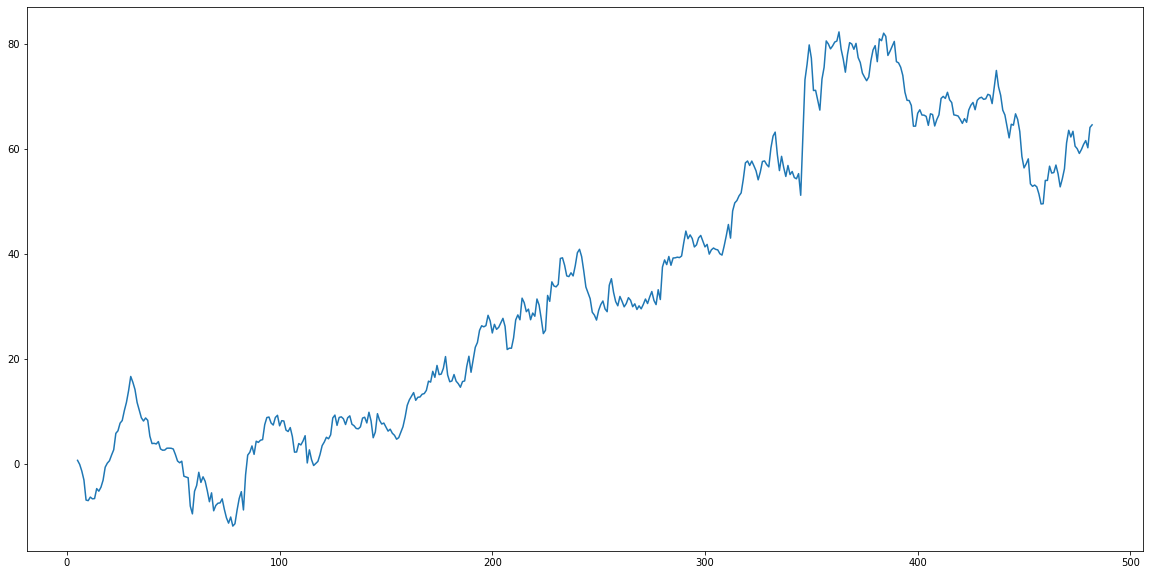

In [21]:
bpcl_data['Net Cummulative Returns'] = (((bpcl_data['Open Price'] - bpcl_data['Close Price'])/(bpcl_data['Open Price']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.plot(bpcl_data['Net Cummulative Returns'])